In [238]:
# Mengimpor library yang diperlukan
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
labelencoder = LabelEncoder()

# Impor dataset
dataset = pd.read_csv('dataset.csv')
datasetc = pd.read_csv('dataset.csv')


In [239]:
columns_to_drop = ['user-id', 'user-gender', 'user-nationality', 'user-knowledge', 'user-loyalty', 'user-loan',
                   'user-riskAversion', 'user-marital', 'product-type', 'product-risk', 'transaction-id', 'product-yield']

datasetc.drop(columns=columns_to_drop, inplace=True)
datasetc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user-age         999 non-null    int64  
 1   user-income      999 non-null    int64  
 2   user-savings     999 non-null    int64  
 3   user-properties  999 non-null    int64  
 4   user-dependents  999 non-null    int64  
 5   user-pension     999 non-null    int64  
 6   product-term     999 non-null    int64  
 7   year             999 non-null    int64  
 8   month            999 non-null    int64  
 9   score            999 non-null    float64
dtypes: float64(1), int64(9)
memory usage: 78.2 KB


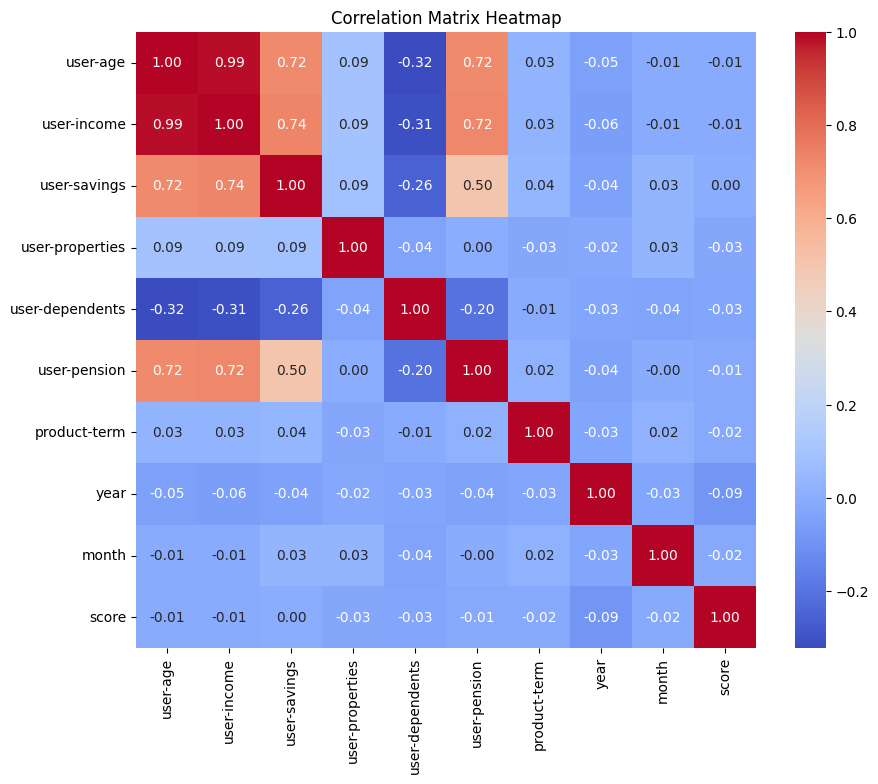

In [240]:
# Menghitung matriks korelasi
correlation_matrix = datasetc.corr()

# Plot heatmap untuk matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [241]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user-id            999 non-null    object 
 1   user-age           999 non-null    int64  
 2   user-gender        999 non-null    object 
 3   user-nationality   999 non-null    object 
 4   user-knowledge     999 non-null    object 
 5   user-loyalty       999 non-null    object 
 6   user-loan          999 non-null    object 
 7   user-income        999 non-null    int64  
 8   user-savings       999 non-null    int64  
 9   user-properties    999 non-null    int64  
 10  user-riskAversion  999 non-null    object 
 11  user-marital       999 non-null    object 
 12  user-dependents    999 non-null    int64  
 13  user-pension       999 non-null    int64  
 14  product-type       999 non-null    object 
 15  product-risk       999 non-null    object 
 16  product-term       999 non

In [242]:
# Identifikasi data dan label
X = dataset.iloc[:, [1, 2, 7, 8, 9]].values #fitur
y = LabelEncoder().fit_transform(dataset.iloc[:, 6].values)

In [243]:
import numpy as np

# Menghitung jumlah kelas dalam variabel target y
classes = np.unique(y)
num_classes = len(classes)

print(f"Jumlah kelas: {num_classes}")
print(f"Kelas yang ada: {classes}")


Jumlah kelas: 2
Kelas yang ada: [0 1]


In [244]:
# Mengonversi data kategori jenis kelamin menjadi numerik
X[:, 1] = labelencoder.fit_transform(X[:, 1])


# Membagi data ke test dan training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [245]:
# Mengimpor library Keras dan turunannya
# Sekarang menggunakan TensorFlow 2.0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Inisialisasi ANN
MesinKlasifikasi = Sequential()

# Menambah input layer dan hidden layer pertama
MesinKlasifikasi.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
# Menambah hidden layer kedua
MesinKlasifikasi.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Menambah output layer
MesinKlasifikasi.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'softmax'))

# Meenjalankan ANN
MesinKlasifikasi.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Fitting ANN ke training set
MesinKlasifikasi.fit(X_train, y_train, batch_size = 10, epochs = 100)

# Memprediksi hasil test sety
y_pred = MesinKlasifikasi.predict(X_test)
y_pred = (y_pred > 0.5)

# # Membuat confusion matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)

Epoch 1/100


80/80 [==============================] - 2s 5ms/step - loss: 0.6687 - accuracy: 0.7897
Epoch 2/100
80/80 [==============================] - 0s 3ms/step - loss: 0.5964 - accuracy: 0.7897
Epoch 3/100
80/80 [==============================] - 0s 3ms/step - loss: 0.5271 - accuracy: 0.7897
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.7897
Epoch 5/100
80/80 [==============================] - 0s 3ms/step - loss: 0.5099 - accuracy: 0.7897
Epoch 6/100
80/80 [==============================] - 0s 3ms/step - loss: 0.5078 - accuracy: 0.7897
Epoch 7/100
80/80 [==============================] - 0s 4ms/step - loss: 0.5071 - accuracy: 0.7897
Epoch 8/100
80/80 [==============================] - 1s 7ms/step - loss: 0.5067 - accuracy: 0.7897
Epoch 9/100
80/80 [==============================] - 0s 4ms/step - loss: 0.5063 - accuracy: 0.7897
Epoch 10/100
80/80 [==============================] - 0s 3ms/step - loss: 0.5061 - accuracy: 0.7897
Epoch 11/100
80/80 [=

In [246]:
# Memprediksi hasil test set
y_pred = MesinKlasifikasi.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Mengambil indeks kelas dengan probabilitas tertinggi
y_test_classes = y_test 

# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

7/7 [==============================] - 0s 6ms/step


In [247]:
# Menghitung akurasi model
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Akurasi model: {accuracy * 100:.2f}%")

Akurasi model: 80.00%


Confusion Matrix:


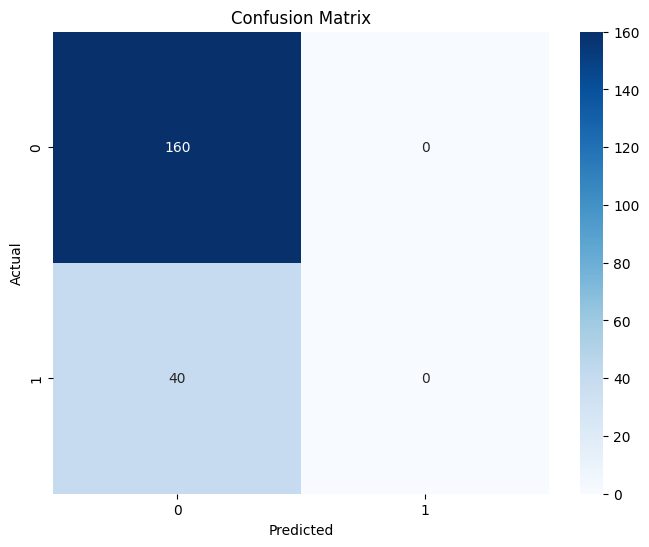

In [248]:
# Menampilkan visualisasi confusion matrix
print("Confusion Matrix:")
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()